In [1]:
import lightgbm as lgb
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import graphviz

In [2]:
df = pd.read_csv('train.csv')
df.head(20)

,label,query,term,cid3,brand,ctf,ctf_cofidence,rf,icf,icf_confidence,icf_max,igm,entropy
0,2,德国大马士革菜刀,菜刀,6209,0,1.257203,0.895938,6.559276,3.466209,3.434476,3.123611,0.107578,1.514633
1,0,背包40升,升,1472,0,0.140667,0.077016,6.328594,0.795462,0.195127,0.456383,0.000270,78.475716
2,1,背包40升,40,1472,0,0.015384,0.020547,2.265659,0.426206,-0.632171,0.087208,0.000010,285.130160
3,2,背包40升,背包,1472,0,0.589172,0.604040,7.789040,1.557790,1.321306,1.218411,0.000933,32.017130
4,0,胖子棉服,胖子,9724,0,0.051179,0.108041,4.480143,2.255441,2.144703,1.915496,0.002880,11.665599
5,1,胖子棉服,棉服,9724,0,0.884975,1.000000,6.697021,2.847753,2.788030,2.506897,0.004982,14.360662
6,0,胜利牌羽毛球拍,胜利牌,1695,0,0.000005,0.001046,1.040822,5.576423,5.572629,5.206833,0.163941,0.070711
7,1,胜利牌羽毛球拍,羽毛球拍,1695,0,1.314902,1.000000,9.469508,3.485330,3.454207,3.142659,0.034481,4.636137
8,0,胡辣汤粉,粉,17699,0,0.020531,0.014704,1.924409,0.672769,-0.041180,0.333720,0.000053,160.208470
9,1,胡辣汤粉,胡辣汤,17699,0,0.291121,1.000000,9.089791,4.388198,4.375697,4.039902,0.337294,0.687750


In [3]:
df.columns

Index(['label', 'query', 'term', 'cid3', 'brand', 'ctf', 'ctf_cofidence', 'rf',
       'icf', 'icf_confidence', 'icf_max', 'igm', 'entropy'],
      dtype='object')

In [4]:
X = df.drop(['label','query','term'], axis=1)
y = df.label

In [5]:
group=np.loadtxt('./group.txt')

In [6]:
train_data = lgb.Dataset(X, label=y, group=group,free_raw_data=False)

In [7]:
params = {
    'task' : 'train', 
    'boosting_type': 'gbdt',
    'objective': 'lambdarank',
    'num_iterations': 200,
    'learning_rate':0.1,
    'num_leaves': 31,
    'tree_learner': 'serial',
    'max_depth': 6,
    'metric': 'ndcg',
    'metric_freq': 10,
    #'train_metric':True,
    #'ndcg_at':[2],
    'max_bin':255,
    'max_position': 20,
    'verbose':0
}

In [8]:
categorical_feature=[0,1]

In [9]:
gbm=lgb.train(params,
              train_data,
              valid_sets=train_data,
              categorical_feature=categorical_feature)

/media/cfs/zhangjun386/.pylib/lib/python3.6/site-packages/lightgbm/engine.py:116: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/media/cfs/zhangjun386/.pylib/lib/python3.6/site-packages/lightgbm/basic.py:1190: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [0, 1]
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


[1]	training's ndcg@1: 0.831405	training's ndcg@2: 0.919083	training's ndcg@3: 0.935083	training's ndcg@4: 0.93635	training's ndcg@5: 0.936408
[2]	training's ndcg@1: 0.867608	training's ndcg@2: 0.936188	training's ndcg@3: 0.948559	training's ndcg@4: 0.949519	training's ndcg@5: 0.94956
[3]	training's ndcg@1: 0.877976	training's ndcg@2: 0.941373	training's ndcg@3: 0.95263	training's ndcg@4: 0.953455	training's ndcg@5: 0.953489
[4]	training's ndcg@1: 0.885902	training's ndcg@2: 0.945834	training's ndcg@3: 0.955891	training's ndcg@4: 0.956583	training's ndcg@5: 0.956611
[5]	training's ndcg@1: 0.890277	training's ndcg@2: 0.948521	training's ndcg@3: 0.957782	training's ndcg@4: 0.95839	training's ndcg@5: 0.958413
[6]	training's ndcg@1: 0.892761	training's ndcg@2: 0.949933	training's ndcg@3: 0.958803	training's ndcg@4: 0.959376	training's ndcg@5: 0.959398
[7]	training's ndcg@1: 0.895951	training's ndcg@2: 0.951582	training's ndcg@3: 0.960087	training's ndcg@4: 0.960608	training's ndcg@5: 0.960

In [10]:
gbm.save_model('model_large.md')

In [11]:
bst = lgb.Booster(model_file='model_large.md')

In [129]:
df_test = pd.read_csv('test.csv')


In [13]:
df_test.head(20)

,label,query,term,cid3,brand,ctf,ctf_cofidence,rf,icf,icf_confidence,icf_max,igm,entropy
0,0,蒙牛熟炭烧,熟,13604,0,0.000166,0.000311,1.005749,1.606720,1.382896,1.267313,0.001006,23.568409
1,1,蒙牛熟炭烧,炭烧,13604,0,0.028298,0.044012,1.994725,2.758024,2.692507,2.417343,0.017914,4.479587
2,2,蒙牛熟炭烧,蒙牛,13604,1,0.164207,0.434249,3.116467,3.389669,3.355368,3.047349,0.023766,4.482465
3,0,蒜香鸡爪自营,自营,17720,0,0.000909,0.001114,1.953166,1.350502,1.050598,1.011227,0.001265,16.611746
4,1,蒜香鸡爪自营,蒜香,17720,0,0.022401,0.060762,4.021842,3.470004,3.438393,3.127392,0.015356,4.306950
5,2,蒜香鸡爪自营,鸡爪,17720,0,0.340484,1.000000,9.450327,3.009072,2.958476,2.667859,0.020885,3.256540
6,0,蓝光钢化膜,蓝光,867,0,0.230688,0.417453,8.336581,1.730940,1.535998,1.391455,0.001295,19.562365
7,1,蓝光钢化膜,钢化膜,867,0,0.771181,0.603069,6.954835,3.040744,2.991764,2.699454,0.012063,10.357600
8,0,蓝牙对讲机京东自营,蓝牙,18524,0,0.052831,0.045346,1.250454,1.586860,1.357991,1.247464,0.000354,63.971256
9,1,蓝牙对讲机京东自营,对讲机,18524,0,1.297248,0.762734,6.601784,2.851843,2.792371,2.510978,0.035906,3.362894


In [130]:
test = df_test.drop(['label','query','term'], axis=1)

In [178]:
y_pred = bst.predict(test)

In [13]:
graph = lgb.create_tree_digraph(bst, tree_index=1, name='tree' + str(0))
graph.render(filename='./tree_5', view=False)

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [23]:
bst.feature_name()

['cid3',
 'brand',
 'ctf',
 'ctf_cofidence',
 'rf',
 'icf',
 'icf_confidence',
 'icf_max',
 'igm',
 'entropy']

In [137]:
bst.feature_importance()

array([ 0,  0, 31, 31, 20,  0,  0,  0, 18,  0])

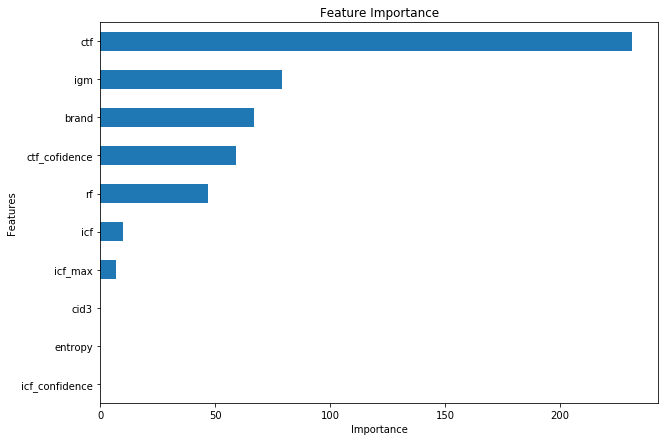

In [149]:
fea_imp = pd.DataFrame({'imp': bst.feature_importance(importance_type='split'), 'col': X.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');

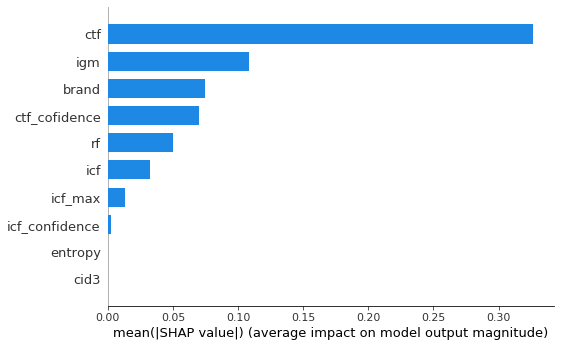

In [200]:
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

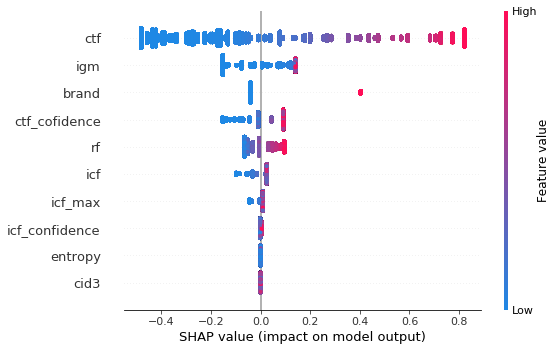

In [186]:
shap.summary_plot(shap_values, X)

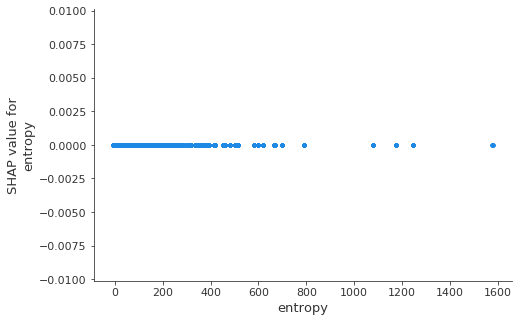

In [206]:
shap.dependence_plot('entropy', shap_values, X, interaction_index=None, show=True)

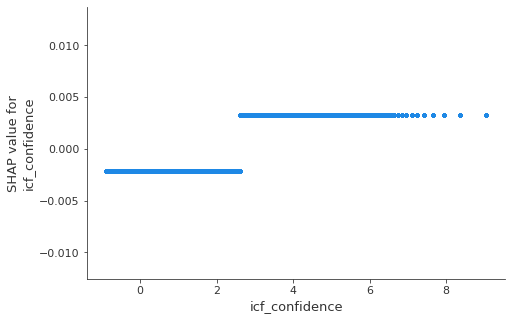

In [204]:
shap.dependence_plot('icf_confidence', shap_values, X, interaction_index=None, show=True)

In [ ]:
df_test.head()

In [42]:
df_test.head()

,label,query,term,cid3,brand,ctf,ctf_cofidence,rf,icf,icf_confidence,icf_max,igm,entropy
0,0,蒙牛熟炭烧,熟,13604,0,0.000166,0.000311,1.005749,1.606720,1.382896,1.267313,0.001006,23.568409
1,1,蒙牛熟炭烧,炭烧,13604,0,0.028298,0.044012,1.994725,2.758024,2.692507,2.417343,0.017914,4.479587
2,2,蒙牛熟炭烧,蒙牛,13604,1,0.164207,0.434249,3.116467,3.389669,3.355368,3.047349,0.023766,4.482465
3,0,蒜香鸡爪自营,自营,17720,0,0.000909,0.001114,1.953166,1.350502,1.050598,1.011227,0.001265,16.611746
4,1,蒜香鸡爪自营,蒜香,17720,0,0.022401,0.060762,4.021842,3.470004,3.438393,3.127392,0.015356,4.306950


In [32]:
average_ndcg, query_ndcg = validate(test_qids, test_y, y_pred, 10)

TypeError: 'method' object is not iterable

In [34]:
test_y.head()

0    0
1    1
2    2
3    0
4    1
Name: label, dtype: int64

In [81]:
df_test = pd.read_csv('test.csv')

In [85]:
test_qids = df_test.drop(['label','cid3','ctf','brand','ctf_cofidence','rf','icf','icf_confidence','igm','icf_max','entropy'], axis=1)

In [86]:
test_qids.head()

,query,term
0,蒙牛熟炭烧,熟
1,蒙牛熟炭烧,炭烧
2,蒙牛熟炭烧,蒙牛
3,蒜香鸡爪自营,自营
4,蒜香鸡爪自营,蒜香


In [58]:
test_qids = df_test.drop(['label','cid3','term','ctf','brand','ctf_cofidence','rf','icf','icf_confidence','igm'], axis=1)

In [89]:
test_qids = test_qids.values

In [90]:
test_y[0]

0

In [91]:
y_pred[0]

-0.21020249033120747

In [92]:
len(test_y)

10002

In [93]:
len(y_pred)

10002

In [96]:
group=np.loadtxt('test_group.txt')

In [179]:
def dcg(scores):
    return np.sum([(np.power(2, scores[i]) - 1) / np.log2(i + 2) for i in range(len(scores))])
        

def idcg(scores):
    scores = [score for score in sorted(scores)[::-1]]
    return dcg(scores)


def save(f, label, pred, query_term):
    for l, p, q_t in zip(label, pred, query_term):
        combine = '\t'.join(q_t)+'\t'+str(l)+'\t'+str(p)
        f.write(combine+'\n')
    
def ndcg(test_qids, test_y, y_pred, group):
    query_dcg = dict()
    b = 0
    e = 0
    all_ndcg = list()
    f = open('predict_test.txt','w')
    
    for i, nums in enumerate(group):
        b = e
        e+=int(nums)
        y = test_y[b:e]
        pred = y_pred[b:e]
        query_term = test_qids[b:e]
        pred_idx = np.argsort(pred)[::-1]
        pred_s = y[pred_idx]
        # predict
        dcg_val = dcg(pred_s)
        # ideal
        idcg_val =idcg(pred_s)
        # score
        ndcg_val = (dcg_val / idcg_val)
        all_ndcg.append(ndcg_val)
        #save txt
        save(f, y, pred, query_term)
    
    average_ndcg = np.nanmean(all_ndcg)
    print(average_ndcg)
    
        
        

ndcg(test_qids, test_y.values, y_pred, group)
        
    
    

0.9598829521451466


In [103]:
for i in test_qids[:10]:
    print(i)

['蒙牛熟炭烧' '熟']
['蒙牛熟炭烧' '炭烧']
['蒙牛熟炭烧' '蒙牛']
['蒜香鸡爪自营' '自营']
['蒜香鸡爪自营' '蒜香']
['蒜香鸡爪自营' '鸡爪']
['蓝光钢化膜' '蓝光']
['蓝光钢化膜' '钢化膜']
['蓝牙对讲机京东自营' '蓝牙']
['蓝牙对讲机京东自营' '对讲机']


In [87]:
test_y.head()

0    0
1    1
2    2
3    0
4    1
Name: label, dtype: int64

In [71]:
test_qids = test_qids['query'].values

In [72]:
test_qids[0]

'蒙牛熟炭烧'

In [74]:
test_y[0]

0

In [76]:
len(test_qids)

10002

In [77]:
len(test_y)

10002

In [78]:
len(y_pred)

10002

In [79]:
test_qids[0]

'蒙牛熟炭烧'

In [80]:
test_y[0]

0

In [ ]:
test_